In [1]:
import pandas as pd
import numpy as np
df_seoulTomb2020 = pd.read_csv('/Users/yeonju1/Documents/bigData/src/07_Python/Project1/data/조선왕릉/문화재청 궁능유적본부_조선왕릉 관람객 수 현황_20201231.csv'
                               , encoding='cp949')
df_seoulTomb2020 = df_seoulTomb2020.drop(['일자'], axis=1)
#df_seoulTomb2020.apply(lambda x: x.str.strip('(유료)'), axis = 1)
Tombnames = pd.Series(df_seoulTomb2020.columns)
Tombnames = Tombnames.str.replace('[(무료)]', '')
Tombnames = Tombnames.iloc[1::7]
Tombnames

<ipython-input-1-9012faaec1d6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  Tombnames = Tombnames.str.replace('[(무료)]', '')


1         동구릉
8          광릉
15        홍유릉
22         사릉
29         태릉
36         정릉
43         헌릉
50         선릉
57         의릉
64        영휘원
71        서오릉
78        서삼릉
85         융릉
92       파주삼릉
99       파주장릉
106      김포장릉
113      양주온릉
120    세종대왕유적
dtype: object

# 카카오지도 조선왕릉 리뷰 웹크롤링

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

In [8]:
import pandas as pd
driver = webdriver.Chrome("/Users/yeonju1/Documents/bigData/src/07_Python/chromedriver")

items = Tombnames
count = 0
current = 0
goal = len(items)
for item in items :
    current += 1
    print('진행상황 : ', current,'/',goal,sep="")
    driver.get("https://map.kakao.com/") # 카카오 지도 열기
    searchbox = driver.find_element_by_xpath("//input[@id='search.keyword.query']") # 검색창에 입력
    searchbox.send_keys(item)
    time.sleep(2)
    searchbutton = driver.find_element_by_xpath("//button[@id='search.keyword.submit']") # 검색버튼 누름
    driver.execute_script("arguments[0].click();", searchbutton)
    time.sleep(2)
    if len(driver.find_elements_by_xpath("//a[@class='moreview']")) != 0:
        print('검색결과 리뷰존재')
        driver.execute_script('window.open("about:blank", "_blank");') # 새 탭 열기
        reviewbutton = driver.find_element_by_xpath("//a[@class='numberofscore']")
        time.sleep(2)
        content_url = reviewbutton.get_attribute("href") 
        tabs = driver.window_handles
        driver.switch_to_window(tabs[1]) # 새 탭으로 이동
        driver.get(content_url) # 링크 열기
        time.sleep(3)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        review_lists = soup.select('.list_evaluation > li')
        if len(review_lists) != 0 :
            for i, review in enumerate(review_lists) :
                user_review = review.select('.txt_comment > span') # 리뷰
                try:
                    row = {"ItemID":item}
                    row = pd.DataFrame(row, index=[i])
                    review_row = {"ItemID":item, "review":user_review[0].text}
                    review_row = pd.DataFrame(review_row, index=[i])
                    #review_elem = pd.DataFrame(review_row, index=[i])
                    review_elem = review_elem.append(review_row, ignore_index = True)
                    time.sleep(1)
                except:
                    row = {"ItemID":item}
                    row = pd.DataFrame(row, index=[i])
                    review_row = {"ItemID":item, "review":user_review[0].text}
                    review_row = pd.DataFrame(review_row, index=[i])
                    review_elem = pd.DataFrame(review_row, index=[i])
                    review_elem = review_elem.append(review_row, ignore_index = True)
        else :
            print("리뷰가 없습니다")
        try:
            for i in range(2,500):
                time.sleep(3)
                another_review = driver.find_element_by_xpath("//a[@data-page='" + str(i) + "']")
                another_review.click()
                time.sleep(3)
                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                review_lists = soup.select('.list_evaluation > li')
                if len(review_lists) != 0 :
                    for i, review in enumerate(review_lists) :
                        user_review = review.select('.txt_comment > span') # 리뷰
                        try:
                            row = {"ItemID":item}
                            row = pd.DataFrame(row, index=[i])
                            review_row = {"ItemID":item, "review":user_review[0].text}
                            review_row = pd.DataFrame(review_row, index=[i])
                            #review_elem = pd.DataFrame(review_row, index=[i])
                            review_elem = review_elem.append(review_row, ignore_index = True)
                            time.sleep(1)
                        except:
                            row = {"ItemID":item}
                            row = pd.DataFrame(row, index=[i])
                            review_row = {"ItemID":item, "review":user_review[0].text}
                            review_row = pd.DataFrame(review_row, index=[i])
                            #review_elem = pd.DataFrame(review_row, index=[i])
                            review_elem = review_elem.append(review_row, ignore_index = True)
        except:
            print("더 이상 리뷰 존재 X")
            driver.close()
        driver.switch_to_window(tabs[0])
        print("검색 페이지로 돌아감")
    else:
        print("검색결과 리뷰없음")

진행상황 : 1/18
검색결과 리뷰존재


<ipython-input-8-eadd14e79f93>:25: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(tabs[1]) # 새 탭으로 이동


더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 2/18


<ipython-input-8-eadd14e79f93>:81: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(tabs[0])


검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 3/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 4/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 5/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 6/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 7/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 8/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 9/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 10/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 11/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 12/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 13/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 14/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 15/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 16/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 17/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 18/18
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감


In [9]:
review_elem

,ItemID,review
0,동구릉,9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도...
1,동구릉,9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도...
2,동구릉,Historical
3,동구릉,
4,동구릉,최악이었다. 5시30분 이후 입장 안되니 참고하시고. 월요일도 휴장이네요. 주차도...
...,...,...
162,세종대왕유적,"문명5에도 나오면 설명이 필요한가 깨우친 임금, 세종e5"
163,세종대왕유적,
164,세종대왕유적,
165,세종대왕유적,공사중 무료


In [30]:
review_elem.iloc[0][1] = ''
review_elem

,ItemID,review
0,동구릉,
1,동구릉,9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도...
2,동구릉,Historical
3,동구릉,
4,동구릉,최악이었다. 5시30분 이후 입장 안되니 참고하시고. 월요일도 휴장이네요. 주차도...
...,...,...
162,세종대왕유적,"문명5에도 나오면 설명이 필요한가 깨우친 임금, 세종e5"
163,세종대왕유적,
164,세종대왕유적,
165,세종대왕유적,공사중 무료


In [31]:
review_elem['review'].replace('', np.nan, inplace=True)

In [32]:
missing_cnt = review_elem.isna().sum() # 결측치 갯수 확인
missing_cnt

ItemID     0
review    70
dtype: int64

In [33]:
review_elem.dropna(inplace=True)

In [34]:
review_elem

,ItemID,review
1,동구릉,9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도...
2,동구릉,Historical
4,동구릉,최악이었다. 5시30분 이후 입장 안되니 참고하시고. 월요일도 휴장이네요. 주차도...
5,동구릉,가족 나들이 하기 좋은곳 나무가 울창해서 걷기 좋아요. 7살 얘들은 힘들어하네요. ...
6,동구릉,9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도...
...,...,...
160,세종대왕유적,교통편만 좋았다면... 버스가 노선이 복잡하고 배차간격이 넓어서 못감... 이천시....
161,세종대왕유적,꼭와라 얘들아
162,세종대왕유적,"문명5에도 나오면 설명이 필요한가 깨우친 임금, 세종e5"
165,세종대왕유적,공사중 무료


In [35]:
for row in review_elem['review']:
    print(''.join(row))

9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도 되고...
Historical 
최악이었다. 5시30분 이후 입장 안되니 참고하시고. 월요일도 휴장이네요.  주차도 입장안되서 나갈려니 10분만 회차적용되고 11분되어서 회차적용 안되고 돈내라고하는 융통성없는 주차장운영도 맘에안들었음. 주차장 최악 별점 1개도 아까움
가족 나들이 하기 좋은곳 나무가 울창해서 걷기 좋아요. 7살 얘들은 힘들어하네요. 어른들 이나 청소년과 함께하기에 좋은곳 입니다. 
9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도 되고...
Historical 
최악이었다. 5시30분 이후 입장 안되니 참고하시고. 월요일도 휴장이네요.  주차도 입장안되서 나갈려니 10분만 회차적용되고 11분되어서 회차적용 안되고 돈내라고하는 융통성없는 주차장운영도 맘에안들었음. 주차장 최악 별점 1개도 아까움
가족 나들이 하기 좋은곳 나무가 울창해서 걷기 좋아요. 7살 얘들은 힘들어하네요. 어른들 이나 청소년과 함께하기에 좋은곳 입니다. 
9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도 되고...
Historical 
최악이었다. 5시30분 이후 입장 안되니 참고하시고. 월요일도 휴장이네요.  주차도 입장안되서 나갈려니 10분만 회차적용되고 11분되어서 회차적용 안되고 돈내라고하는 융통성없는 주차장운영도 맘에안들었음. 주차장 최악 별점 1개도 아까움
가족 나들이 하기 좋은곳 나무가 울창해서 걷기 좋아요. 7살 얘들은 힘들어하네요. 어른들 이나 청소년과 함께하기에 좋은곳 입니다. 
능에 대한 해설표지판이 심하게 단순하다. 정보가 거의 없다시피… 둥근 묘와 나무들만 실컷보다 돌아옴
겨울에도 정갈하고 운치있어요
요즘 코로나때문에 더 한적해요. 울창한 나무에서 뿜어나오는 나무 숨결이 나를 살려주는 느낌입니다. 
6/14일 이후 무기한 휴관 연장입니다. 안내를 올려주시지... 헛걸음 했습니다...
아주 좋았어요.  규

In [36]:
review_text = ' '.join(review_elem['review'])
review_text[:500]

'9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도 되고... Historical  최악이었다. 5시30분 이후 입장 안되니 참고하시고. 월요일도 휴장이네요.  주차도 입장안되서 나갈려니 10분만 회차적용되고 11분되어서 회차적용 안되고 돈내라고하는 융통성없는 주차장운영도 맘에안들었음. 주차장 최악 별점 1개도 아까움 가족 나들이 하기 좋은곳 나무가 울창해서 걷기 좋아요. 7살 얘들은 힘들어하네요. 어른들 이나 청소년과 함께하기에 좋은곳 입니다.  9릉을 다돌아보니 고즈넉하고 잘 정돈되어 있는게 아주 좋아요~ 운동도되고 역사공부도 되고... Historical  최악이었다. 5시30분 이후 입장 안되니 참고하시고. 월요일도 휴장이네요.  주차도 입장안되서 나갈려니 10분만 회차적용되고 11분되어서 회차적용 안되고 돈내라고하는 융통성없는 주차장운영도 맘에안들었음. 주차장 최악 별점 1개도 아까움 가족 나들이 하기 좋은곳 나무가 울창해서 걷기 좋아요. 7'

## 자연어처리

In [37]:
# 명사들 추출
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size=2024)
word_list = komoran.nouns('%r' % review_text)
print('명사 출현 빈도 : ', len(word_list))
print('출현 명사 갯수 : ', len(set(word_list))) # set() : 중복제거
print('한 단어당 평균 반복 횟수 : ', len(word_list) / len(set(word_list)))
print(type(word_list))
print(word_list[:10])

명사 출현 빈도 :  580
출현 명사 갯수 :  297
한 단어당 평균 반복 횟수 :  1.9528619528619529
<class 'list'>
['릉', '정돈', '운동', '역사', '공부', '최악', '시', '분', '이후', '입장']


In [38]:
# 워드 클라우드 할 text는 리스트를 하나의 연결된 문자여야 함 : '대한민국 헌번 유구 한 ~' 
text = ' '.join(word_list) # join사용해서 스페이스로 연결
text[:100]

'릉 정돈 운동 역사 공부 최악 시 분 이후 입장 안 참고 월요일 휴 장 주차 입장 안 10분 회차 적용 분 회차 적용 안 돈 융통 주차장 운영 맘 주차장 최악 별점 개 가족 곳 나'

(-0.5, 399.5, 199.5, -0.5)

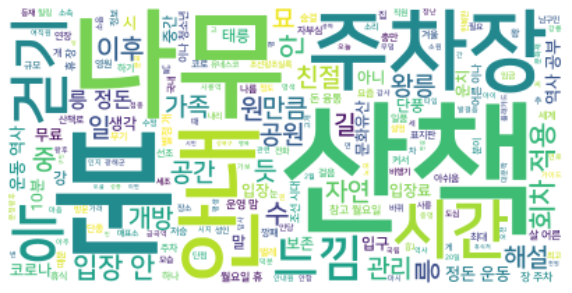

In [159]:
# 불용어 처리(불용어 지정 + 불용어 사전)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
불용어 = STOPWORDS | set(['곳', '것', '최악'])
불용어 = set(['곳', '것', '최악'])

wordcloud = WordCloud(background_color='white',
                     max_words=200,
                     font_path='library/Fonts/NanumSquareOTFBold.otf',
                     relative_scaling=0.2,
                     stopwords=불용어)
wordcloud.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [191]:
# 마스킹
from PIL import Image
import numpy as np
img = Image.open('data/pic2.png').convert('RGBA') # RGB와 투명도 컨버트
# mask = Image.new('RGB', img.size, (0,0,0))
# mask.paste(img)
# plt.imshow(mask)
# mask = np.array(mask)
mask = np.array(img)

(-0.5, 1741.5, 1474.5, -0.5)

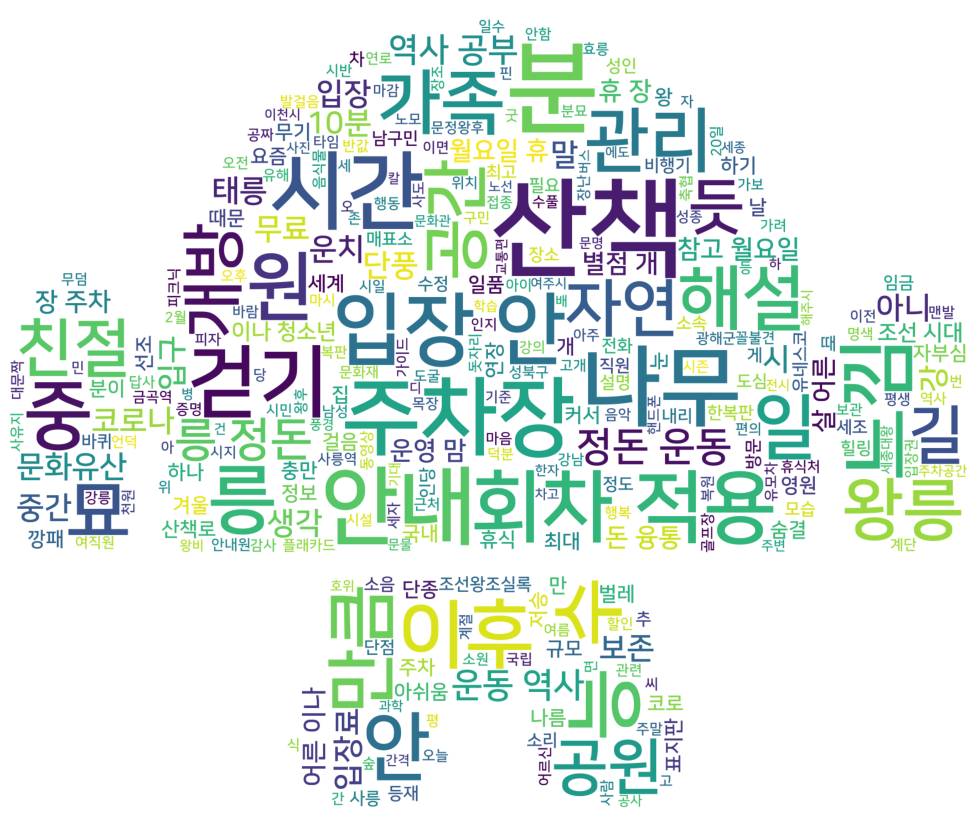

In [194]:
from wordcloud import STOPWORDS
불용어 = STOPWORDS | set(['곳', '것', '최악'])
불용어 = set(['곳', '것', '최악'])

wordcloud = WordCloud(background_color='white',
                     max_words=700,
                     font_path='library/Fonts/NanumSquareOTFBold.otf',
                     relative_scaling=0.3,
                     stopwords=불용어,
                     mask=mask)
wordcloud.generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# 생성된 wordcloud 저장
wordcloud.to_file('test3_wordcloud.png')

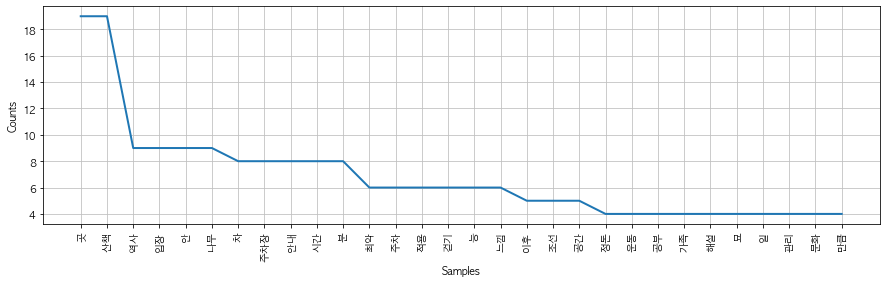

In [166]:
# 단어 빈도수 시각화(Text)
import nltk
import matplotlib.pyplot as plt
from konlpy.tag import Kkma
kkma = Kkma()
tagged_data = kkma.pos(text, 56)
nouns_list = [t[0] for t in tagged_data if t[1]=='NNG']
nouns_list[:10]
plt.rc('font', family='AppleGothic')
plt.figure(figsize=(15,4))
nltk.Text(nouns_list).plot(30)

In [167]:
# 정렬된 wordcount
from nltk import FreqDist
dic = dict(FreqDist(nouns_list))
wordcnt = pd.Series(dic)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt.head(10)

곳      19
산책     19
나무      9
역사      9
입장      9
안       9
안내      8
주차장     8
차       8
시간      8
dtype: int64